In [52]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
commod_global_df = pd.read_csv('commodity_trade_statistics_data.csv')
commod_global_df.head()

#for the puposes of this project I will be focussing on country, year, flow, and trade_usd

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,Afghanistan,2016,10410,"Sheep, live",Export,6088,2339.0,Number of items,51.0,01_live_animals
1,Afghanistan,2016,10420,"Goats, live",Export,3958,984.0,Number of items,53.0,01_live_animals
2,Afghanistan,2008,10210,"Bovine animals, live pure-bred breeding",Import,1026804,272.0,Number of items,3769.0,01_live_animals
3,Albania,2016,10290,"Bovine animals, live, except pure-bred breeding",Import,2414533,1114023.0,Number of items,6853.0,01_live_animals
4,Albania,2016,10392,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,9484953.0,Number of items,96040.0,01_live_animals


In [54]:
commod_global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8225871 entries, 0 to 8225870
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   country_or_area  object 
 1   year             int64  
 2   comm_code        object 
 3   commodity        object 
 4   flow             object 
 5   trade_usd        int64  
 6   weight_kg        float64
 7   quantity_name    object 
 8   quantity         float64
 9   category         object 
dtypes: float64(2), int64(2), object(6)
memory usage: 627.6+ MB


Introduction:


Currently, given the Covid-19 pandemic of 2020 many developed countries including the United States are beginning to consider whether or not their economies are too reliant on export and manufacturing from China. As a result it is important we consider the history of commodity exports from China, from it's early stage to it's developed and flourishing stage. This is why I will be looking at changes in commodity exports from china in 1996 and then again in 2016. Measuring a 20 year period and quantifying changes by using the value of trade in USD. 


Hypothesis:


Ho: There is no significant relationship between the average USD value of Chinese commodity trades in 1996 and the average USD value of Chinese commodity trades in 2016

Ha: There is a significant relationship between the average USD value of Chinese commodity trades in 1996 and the average USD value of Chinese commodity trades in 2016


Data:


There are 8,225,871 values and 10 columns in the dataset. I found my data in Kaggle, and it was gathered by the UN.

In [55]:
print(commod_global_df.shape)

#there are 8,225,871 values and 10 variables in this dataset

(8225871, 10)


In [56]:
commod_global_df['trade_usd'].unique()
#I checked to makes sure that all my variables do in fact have the information i need, I will now check for null values

array([      6088,       3958,    1026804, ..., 1924962432, 2658853376,
       1845905792])

In [57]:
commod_global_df.isnull()

#there are no missing values in the variables I will be measuring

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8225866,False,False,False,False,False,False,True,False,True,False
8225867,False,False,False,False,False,False,True,False,True,False
8225868,False,False,False,False,False,False,True,False,True,False
8225869,False,False,False,False,False,False,True,False,True,False


Methods:

In order to test the significance of my hypothesis I will begin by creating two variables which I can run against eachother. The first called china_ex_96 denotes Chinese exports in 1996 and the second variable china_exp_16 denotes Chinese exports in 2016. This way I can measure the difference in mean between the value of the trade in USD in 1996 compared to the value of trade in USD in 2016. I combined these three variables, Country, year, and flow, so it would be easier to measure the value of the trade, and the testing process would be cleaner. 

If the distribution of the histogram for export value in 1996 and 2016 are not normally distributed and skewed based on kurtosis and skewness then I will use a kruskall wallis test to determine p value. Following the wallis test I will determine the difference in means between 1996 and 2016 by finding the 95% confidence interval, as well as the usd value mean for both years. 

In [58]:
china_exp_96 = commod_global_df[(commod_global_df['country_or_area'] == 'China') & 
                                         (commod_global_df['year'] == 1996) & 
                                         (commod_global_df['flow'] == 'Export')]
china_exp_16 = commod_global_df[(commod_global_df['country_or_area'] == 'China') & 
                                         (commod_global_df['year'] == 2016) & 
                                         (commod_global_df['flow'] == 'Export')]


In [59]:
print(china_exp_96.info())
print(china_exp_16.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2683 entries, 10226 to 8218492
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_or_area  2683 non-null   object 
 1   year             2683 non-null   int64  
 2   comm_code        2683 non-null   object 
 3   commodity        2683 non-null   object 
 4   flow             2683 non-null   object 
 5   trade_usd        2683 non-null   int64  
 6   weight_kg        2682 non-null   float64
 7   quantity_name    2683 non-null   object 
 8   quantity         2681 non-null   float64
 9   category         2683 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 230.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2456 entries, 9772 to 8218436
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_or_area  2456 non-null   object 
 1   year     

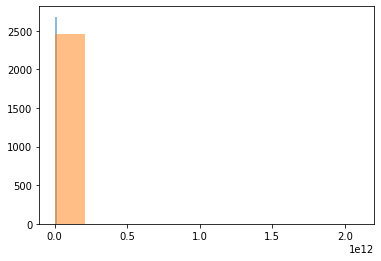

DescribeResult(nobs=2683, minmax=(5, 151047461759), mean=85717851.78941484, variance=8.513877145633314e+18, skewness=51.64608963165021, kurtosis=2669.489820857233)
DescribeResult(nobs=2456, minmax=(12, 2097637171895), mean=1161833185.0594463, variance=1.7922369697626343e+21, skewness=49.47823073873035, kurtosis=2447.719166731493)


In [60]:
# Plot the histogram 

plt.hist(china_exp_96['trade_usd'], alpha = .5)
plt.hist(china_exp_16['trade_usd'], alpha = .5)
plt.show()

print(stats.describe(china_exp_96['trade_usd']))
print(stats.describe(china_exp_16['trade_usd']))

In [61]:
stats.kruskal(
    china_exp_96['trade_usd'],
    china_exp_16['trade_usd'])

#As a result of the test I can see the pvalue is 3.34 and I will therefore reject the null hypothesis stating that
#There is no significant relationship between the average quantity of Chinese commodity exports in 1996 
#and the average quantity of Chinese commodity exports in 2016
#Let's do a confidence test so we can see the difference between our two variables

KruskalResult(statistic=856.1513478428639, pvalue=3.343920756835248e-188)

In [63]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(china_exp_96['trade_usd'], china_exp_16['trade_usd']))

#what is the average amount spent in USD on exports from China in 1996 and in 2016

print(china_exp_96['trade_usd'].mean())
print(china_exp_16['trade_usd'].mean())

#The 95% confidence interval suggests that the difference in the average sale between the average amount spent 
#between 1996 and 2016 on Chinese exports is between 601,845,517 and 2,754,076,184 which makes sense given the 
#mean in 1996 was 85,717,851 and in 2016 the mean on Chinese exports were 1,161,833,185.

The difference in means at the 95% confidence interval (two-tail) is between -601845517.5408797 and 2754076184.0809426.
85717851.78941484
1161833185.0594463


Results:

Because both variables were highly skewed I did a kruskall wallis test and found the p value was extremely low at 3.3e-188. As a result I was not able to reject the null stating there is no significant relationship between the usd value of Chinese commodity exports in 1996 and in 2016. I then looked at the confidence interval of 95% and found a difference in export values from 1996 to 2016 between 601,845,517 and 2,754,076,184, the value means are accurately reflected in both years. The mean values being, 85,717,851 in year 1996 and 1,161,833,185 in 2016. 


Discussion and Recommendation:

As we can see there was a huge increase in the value of exports from 1996 to 2016, however, I must note that I cannot confirm whether or not the trade_usd data has accounted for inflation. Nevertheless the increase is quite large at 2,152,230,667 usd. In terms of further testing I would recommend looking at the specific export categories to see specifically which Chinese sectors have grown in comparison to others. Perhaps then considering decreasing reliance on the highest growth industries. This could result in economic officials rethinking their policies, and perhaps fostering the growth of similar domestic industries or diversifying international suppliers within these particular sectors. 